In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("binary_classification_train.csv")

In [4]:
data


,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,47996,-36.628645,-165.120975,107.217867,122.925449,62.981807,19.830836,-3.643254,-45.443651,-149.839003,...,-10.218916,12.704617,25.496814,-102.901598,-45.433223,15.287095,194.369851,-45.661009,-78.589630,0
47996,47997,-39.109204,-9.889646,-6.131819,-52.788080,80.955847,-1.706958,-3.413089,-29.704302,-36.493671,...,-116.006445,0.868396,-146.734100,270.764036,6.377969,-97.921769,131.505353,-6.202176,-94.503454,1
47997,47998,-35.345541,-80.690360,94.402843,9.939977,70.557427,-24.686198,-10.011303,-30.297466,-117.836860,...,-12.575333,13.949337,-39.750319,0.710971,-44.584569,-33.617283,135.929230,-48.408353,-75.406154,0
47998,47999,-39.594067,-63.804277,52.270657,-140.771476,91.726459,48.515770,6.772685,-31.187427,-199.382895,...,3.318065,13.166798,-193.058900,354.841782,-11.650224,-81.109922,208.534353,-38.514382,-85.694189,0


In [5]:
X=data.iloc[:,1:-1].to_numpy()
y=data.iloc[:,-1].to_numpy()

In [6]:
X,y

(array([[ -36.96309934,  -15.01470294,   87.10043472, ...,  173.72298705,
          -17.34916949,  -82.55084389],
        [ -43.71567402,   18.8471157 ,   89.54340644, ...,   11.59251925,
         -106.12360525,  -92.79642051],
        [ -30.73755019,  -63.72964268,  106.08133168, ...,  164.83249783,
          -37.41290151,  -85.44115039],
        ...,
        [ -35.345541  ,  -80.69036019,   94.40284293, ...,  135.92923004,
          -48.4083528 ,  -75.40615407],
        [ -39.59406722,  -63.80427731,   52.27065677, ...,  208.53435295,
          -38.51438167,  -85.69418917],
        [ -32.70246498, -111.47849646,  109.34139873, ...,  126.45446899,
          -38.14487487,  -86.07439614]]),
 array([0, 1, 0, ..., 0, 0, 1]))

In [7]:
def norm_l(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_scaled=(X-mean)/std
    return X_scaled

In [8]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [9]:
def compute_cost_logistic(X,y,w,b):
    m=X.shape[0]
    Z=np.dot(X,w)+b
    f_wb=sigmoid(Z)
    f_wb=np.clip(f_wb,0,1)
    cost=-np.sum(y*np.log(f_wb)+(1-y)*np.log(1-f_wb))
    cost=cost/m
    return cost

In [10]:
def compute_gradient_descent(X,y,w,b,alpha,num_iters):
    j_hist=[]
    for i in range(num_iters):
        f_wb=sigmoid(np.dot(X,w)+b)
        dw=(1/X.shape[0])*np.dot(X.T,f_wb-y)
        db=(1/X.shape[0])*np.sum(f_wb-y)
        w=w-alpha*dw
        b=b-alpha*db
        j_hist.append(compute_cost_logistic(X,y,w,b))  
        if i%100==0:
            print(f"Iterations{i}: Cost={compute_cost_logistic(X,y,w,b)}")
    return w,b,j_hist       
        
                      
                      
        

In [11]:
X_scaled=norm_l(X)
w_in=np.zeros(X.shape[1])
b_in=0
iterations=2000
alpha=0.03
w_final,b_final,J_history=compute_gradient_descent(X_scaled,y,w_in,b_in,alpha,iterations)
print(w_final)
print(b_final)


Iterations0: Cost=0.6834053758086023
Iterations100: Cost=0.3619697355082247
Iterations200: Cost=0.3029873163910626
Iterations300: Cost=0.2798988303060123
Iterations400: Cost=0.26820996988671464
Iterations500: Cost=0.26145025636249214
Iterations600: Cost=0.25720940828472594
Iterations700: Cost=0.25439858104088137
Iterations800: Cost=0.2524603662200316
Iterations900: Cost=0.25108325388813696
Iterations1000: Cost=0.25008151984390375
Iterations1100: Cost=0.24933881723862422
Iterations1200: Cost=0.24877936784709337
Iterations1300: Cost=0.2483522453162779
Iterations1400: Cost=0.2480223327964153
Iterations1500: Cost=0.24776488883671868
Iterations1600: Cost=0.24756216109400825
Iterations1700: Cost=0.24740121064416745
Iterations1800: Cost=0.2472724771964262
Iterations1900: Cost=0.2471688114286624
[ 0.01116563 -0.02175003  0.01195739 -0.60360103  0.00390643  1.60180892
  0.02656138  0.01585506  0.30578228  0.02766415 -0.03935319 -0.01717023
 -0.02013931  0.33945299  0.67247449 -0.50918752  0.853

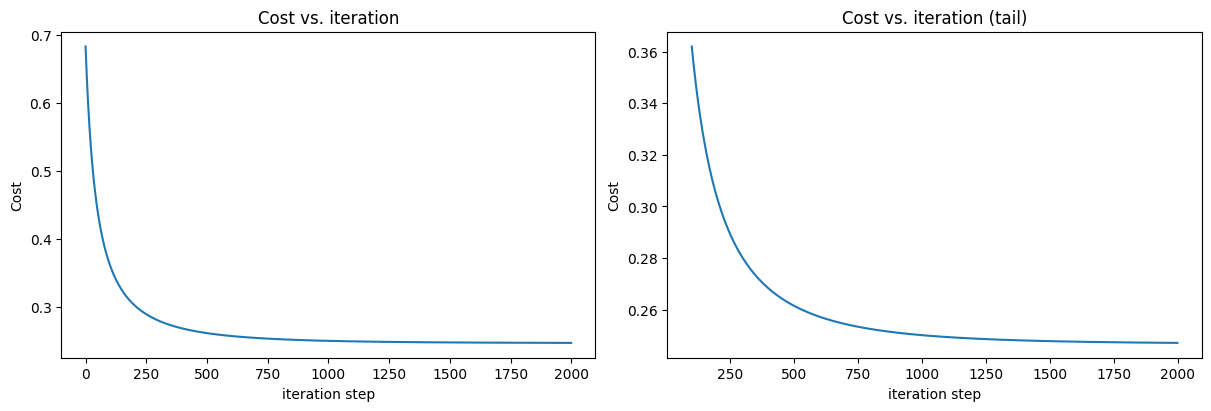

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [20]:
target_value=np.dot(X_scaled,w_final)+b_final

In [21]:
prediction=np.array([target_value.reshape(-1,1)])
prediction

array([[[-3.68980993],
        [ 2.11503494],
        [-3.29235243],
        ...,
        [-3.47952629],
        [-2.46220501],
        [ 1.35899605]]])

In [22]:
yhat=np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i,0]>=0.5:
        yhat[i]=1
    else:
        yhat[i]=0

In [27]:
print(f"decisions=\n{yhat}")

decisions=
[[[0]
  [1]
  [0]
  ...
  [0]
  [0]
  [1]]]


In [29]:
def compute_f1(y_true, y_pred):
    
    TP = np.sum((y_true == 1) & (y_pred == 1)) 
    FP = np.sum((y_true == 0) & (y_pred == 1))  
    FN = np.sum((y_true == 1) & (y_pred == 0))  
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1, precision, recall


yhat = (prediction >= 0.5).astype(int)  # Threshold at 0.5
f1, precision, recall = compute_f1(y, yhat)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1 Score: 0.2964703348836125
Precision: 0.3184166666666667
Recall: 0.2773541666666667


In [31]:
test_data=pd.read_csv("binary_classification_test.csv")

In [32]:
test_data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,1,-21.263636,-101.510764,70.115563,-67.257828,60.603386,-14.047965,-20.077225,-39.171738,-109.037261,...,7.362312,-55.689290,11.794318,-192.876941,174.389915,-56.913898,-66.920817,136.880728,-53.746527,-88.624312
1,2,-28.646489,-104.090028,124.098974,-45.906780,85.691869,91.241763,-2.532164,-43.701116,-151.491278,...,-45.258211,-55.069378,11.297918,-212.560404,330.864084,-39.186926,-52.041948,155.040051,-43.390476,-85.584791
2,3,-34.084427,-149.471464,131.883193,96.372918,41.865528,-14.692982,25.448955,-56.218421,-179.342647,...,-29.196270,-34.475233,0.030514,-41.534695,-36.002752,-90.759938,5.575351,201.929910,-40.225772,-86.235677
3,4,-38.905587,-126.038930,86.480118,-76.173919,98.722116,15.411935,-35.391915,-23.142612,-109.017318,...,-49.361568,-103.689725,12.311099,-188.698902,229.626393,-35.442610,-72.384866,100.019033,-56.657687,-83.543328
4,5,-41.041415,-124.302646,89.549410,-98.980090,72.425692,15.907022,5.400643,-32.267154,-181.961829,...,-3.392246,-27.353560,13.073419,-138.289303,151.146083,-60.065501,-45.043483,196.572356,-58.595875,-81.748002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,-24.270292,-40.953059,126.403165,-85.023186,73.873895,19.786924,-22.982705,-50.008823,-156.884564,...,25.978997,-113.367380,10.986390,-140.942676,182.139617,-43.847476,-54.396578,168.108976,-52.430031,-82.596009
11996,11997,-30.474886,-201.124891,79.824920,-96.541722,77.483155,186.285533,-25.046521,-29.834080,-119.905884,...,-15.314635,-64.909589,14.436577,59.749052,138.863511,29.666147,-13.209735,23.457680,-81.892426,-91.273899
11997,11998,-24.547995,-152.072592,132.767918,-27.689569,141.583374,68.408449,-8.904655,-47.991714,-213.988828,...,-66.195623,-7.965866,16.889205,39.397099,-23.141800,-36.332002,7.761841,148.106184,-80.194494,-89.791122
11998,11999,-29.200068,-100.303304,115.709923,-91.765981,108.346710,213.651331,-42.345070,-29.450930,-159.795863,...,-30.179518,7.833912,6.801287,28.557516,231.858233,-2.655919,-0.618842,180.817907,-36.343703,-85.994005


In [33]:
X_test=data.iloc[:,1:-1].to_numpy()

In [34]:
X_test

array([[ -36.96309934,  -15.01470294,   87.10043472, ...,  173.72298705,
         -17.34916949,  -82.55084389],
       [ -43.71567402,   18.8471157 ,   89.54340644, ...,   11.59251925,
        -106.12360525,  -92.79642051],
       [ -30.73755019,  -63.72964268,  106.08133168, ...,  164.83249783,
         -37.41290151,  -85.44115039],
       ...,
       [ -35.345541  ,  -80.69036019,   94.40284293, ...,  135.92923004,
         -48.4083528 ,  -75.40615407],
       [ -39.59406722,  -63.80427731,   52.27065677, ...,  208.53435295,
         -38.51438167,  -85.69418917],
       [ -32.70246498, -111.47849646,  109.34139873, ...,  126.45446899,
         -38.14487487,  -86.07439614]])

In [37]:
def predict(X, w, b, threshold=0.5):
    probabilities = sigmoid(np.dot(X, w) + b)  # Compute probabilities
    predictions = (probabilities >= threshold).astype(int)  # Apply threshold
    return predictions
X_test_scaled = norm_l(X_test)  
y_test_predicted = predict(X_test_scaled, w_final, b_final)
predicted_values=y_test_predicted
predicted_values=pd.DataFrame(predicted_values)
pd.set_option('display.max_rows',None)




In [ ]:
predicted_values